In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy as np
import datetime
%matplotlib inline

In [42]:
activity = pd.read_csv('agg_info.csv')
mission = pd.read_csv('user_mission.csv')

In [35]:
activity.head()

,idaggregate_info,user_id,dt,num_events,num_lark_convo_events,num_meals_logged,num_breakfasts,num_lunches,num_dinners,num_snacks,total_activity,sleep_duration,num_activity_events,num_weights,num_notifs
0,0,0,2018-08-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,2018-08-02 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,2018-08-03 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,2018-08-04 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,2018-08-05 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0


In [244]:
mission.head()

,idusermission,start_timestamp,end_timestamp,completed,user_id
0,0,2018-08-03 20:30:55,2018-08-10 15:40:58,1,78
1,1,2018-08-10 15:40:58,2018-08-17 13:18:01,1,78
2,2,2018-08-17 13:18:01,2018-08-24 16:13:03,1,78
3,3,2018-08-24 16:13:03,0000-00-00 00:00:00,0,78
4,4,2018-08-04 20:51:38,2018-08-11 19:16:38,1,89


In [245]:
mission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
idusermission      1000 non-null int64
start_timestamp    1000 non-null object
end_timestamp      1000 non-null object
completed          1000 non-null int64
user_id            1000 non-null int64
dtypes: int64(3), object(2)
memory usage: 39.1+ KB


In [6]:
# parsing timestamps
mission[['start_ymd','start_hms']] = mission.start_timestamp.str.split(" ",expand=True)
mission[['end_ymd','end_hms']] = mission.end_timestamp.str.split(" ",expand=True)
mission[['start_year','start_month','start_day']] = mission.start_ymd.str.split("-",expand=True).astype(str).astype(int)
mission[['end_year','end_month','end_day']] = mission.end_ymd.str.split("-",expand=True).astype(str).astype(int)

# days taken to complete a mission = end day - start day
mission['day_diff'] = mission.end_day.astype(str).astype(int) - mission.start_day.astype(str).astype(int)
mission.head()

,idusermission,start_timestamp,end_timestamp,completed,user_id,start_ymd,start_hms,end_ymd,end_hms,start_year,start_month,start_day,end_year,end_month,end_day,day_diff
0,0,2018-08-03 20:30:55,2018-08-10 15:40:58,1,78,2018-08-03,20:30:55,2018-08-10,15:40:58,2018,8,3,2018,8,10,7
1,1,2018-08-10 15:40:58,2018-08-17 13:18:01,1,78,2018-08-10,15:40:58,2018-08-17,13:18:01,2018,8,10,2018,8,17,7
2,2,2018-08-17 13:18:01,2018-08-24 16:13:03,1,78,2018-08-17,13:18:01,2018-08-24,16:13:03,2018,8,17,2018,8,24,7
3,3,2018-08-24 16:13:03,0000-00-00 00:00:00,0,78,2018-08-24,16:13:03,0000-00-00,00:00:00,2018,8,24,0,0,0,-24
4,4,2018-08-04 20:51:38,2018-08-11 19:16:38,1,89,2018-08-04,20:51:38,2018-08-11,19:16:38,2018,8,4,2018,8,11,7


In [7]:
# since everyone get mission in the same order, ranking start day by user gets us mission 1,2,3.. for each user
mission['mission_number'] = mission.groupby('user_id')['start_day'].rank(ascending=True).round().astype(str)

In [8]:
# get a list of completed mission: excluding mission incomplete, date diff less than five days - they are data error
mission_complete = mission[(mission['completed']==1) & (mission['day_diff']>=5)]

In [9]:
# Total mission started in the month: 1000
mission.idusermission.count()

1000

In [10]:
# Total mission completed: 374
mission_complete.idusermission.count()

374

In [11]:
# min, max, avg ... days to complete mission
mission_complete.day_diff.describe()

count    374.000000
mean       7.727273
std        1.718985
min        6.000000
25%        7.000000
50%        7.000000
75%        8.000000
max       20.000000
Name: day_diff, dtype: float64

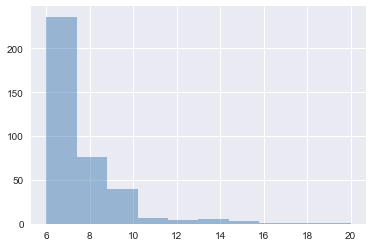

In [252]:
# histogram of days taken to complete mission - screwed - most user took 6 - 10 days 
plt.hist(mission_complete['day_diff'],bins=10,alpha=0.5,histtype='stepfilled', color='steelblue');

In [253]:
# count of competed mission and average days to complete by each mission, assuming the first mission of any users in the dataset is this user's very first mission.
mission_complete.groupby(['mission_number']).agg({'day_diff':['count','mean']})
# There were 327 mission one completed, took 7.6 days on average to finish , etc.

day_diff          
                  count      mean
mission_number                   
1.0                 327  7.660550
2.0                  37  8.405405
3.0                  10  7.400000

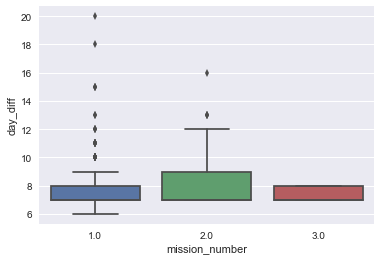

In [25]:
# boxplot for the same thing
sns.boxplot(x='mission_number',y='day_diff',data=mission_complete)

In [19]:
# list of people who took long time to finish
slow_complete_users = mission_complete[mission_complete['day_diff']>10][['user_id']]

In [12]:
### mission give up analysis ###
# give up definition: the start day of incomplete mission is earlier than 23th. They have enough time to finish a mission but did not. Their missions are considered not likely to be finished in the next month. 
# give up definition is made because 8 day(31-23) is the 75 percentile day to finish a mission
# start_day_min is the first day of user started their first mission, start_day_max is the day of user started their latest/incomplete mission
mission_beg_drop_day = mission.groupby(['user_id']).agg({'start_day':['min','max']}).reset_index()
mission_beg_drop_day.columns = ["_".join(x) for x in mission_beg_drop_day.columns.ravel()]
mission_beg_drop_day['beg_drop_diff'] = mission_beg_drop_day['start_day_max'] - mission_beg_drop_day['start_day_min']

# notice that everyone has one incomplete mission 
# therefore beg_drop_diff = 0 indicates that they never complete any mission and dropped, 8 indicates that 8 days after they were onsite they dropped
mission_beg_drop_list = mission_beg_drop_day[mission_beg_drop_day.start_day_max <= 23]

In [16]:
mission_beg_drop_list.head()

,user_id_,start_day_min,start_day_max,beg_drop_diff
2,5,17,17,0
4,7,16,23,7
7,17,20,20,0
8,18,23,23,0
11,22,23,23,0


In [17]:
mission_beg_drop_list.groupby(['beg_drop_diff']).agg({'user_id_':['count']})
# Observation: There were 149 people never completed the mission one they started before 23th. 6+ days are all single digit numbers. 
# conclusion: For users who completed at least one mission, they are very likely to moving on and are unlikely to give up. 

,user_id_
,count
beg_drop_diff,
0,149
6,1
7,2
8,5
9,1
10,2
12,1
13,2


In [22]:
# Do users took too longer(>10 days) to complete mission got discouraged and gave up? 4 out of 22 'slow users' gave up later. So this is not the case. 
np.intersect1d(slow_complete_users , mission_beg_drop_list.user_id_)

array([48, 72, 79, 80], dtype=int64)

In [47]:
# assuming 0 means did not log and ignore the fact that it might actually be 0
# replace 0 with nan then describe the dataset 
activity1 = activity.replace(0, np.nan)
activity1.describe()
# By comparing count, we can see that users tend to not log weight(only 48 times), but like to log activities. Sleep and Meals are in between. 
# It's suggested to improve weight log function unless it's designed to be showen less frequently to users.
# Other fun facts: Every day, on avg, users slept 29245 sec(8.12 hr), spent 3049 sec(0.84 hr) and had 3.2 Lark conversations.

,idaggregate_info,user_id,num_events,num_lark_convo_events,num_meals_logged,num_breakfasts,num_lunches,num_dinners,num_snacks,total_activity,sleep_duration,num_activity_events,num_weights,num_notifs
count,999.000000,971.000000,264.000000,186.000000,174.000000,135.0,111.000000,75.0,57.000000,261.000000,156.000000,261.000000,48.000000,207.000000
mean,500.000000,17.245108,28.666667,4.080645,2.316092,1.0,1.027027,1.0,1.385965,3049.344828,29245.230769,24.854406,1.645833,3.318841
std,288.530761,9.672773,19.364099,3.214654,1.289385,0.0,0.162898,0.0,0.700877,2977.418586,10297.886588,17.888164,1.756321,2.733251
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,15.000000,59.000000,1.000000,1.000000,1.000000
25%,250.500000,9.000000,12.000000,2.000000,1.000000,1.0,1.000000,1.0,1.000000,1092.000000,23451.500000,9.000000,1.000000,1.000000
50%,500.000000,17.000000,24.500000,3.000000,2.000000,1.0,1.000000,1.0,1.000000,2052.000000,27351.000000,22.000000,1.000000,2.000000
75%,749.500000,26.000000,43.250000,5.000000,3.000000,1.0,1.000000,1.0,2.000000,3933.000000,31971.000000,38.000000,1.000000,4.000000
max,999.000000,34.000000,81.000000,19.000000,7.000000,1.0,2.000000,1.0,4.000000,19749.000000,64763.000000,81.000000,9.000000,15.000000


In [49]:
# Get sum of metrics by user
act_agg = activity.groupby(['user_id']).agg({'num_events':'sum', 
                                           'num_lark_convo_events':'sum', 
                                           'num_meals_logged':'sum', 
                                           'num_breakfasts':'sum', 
                                           'num_lunches':'sum', 
                                           'num_dinners':'sum', 
                                           'num_snacks':'sum', 
                                           'total_activity':'sum', 
                                           'sleep_duration':'sum', 
                                           'num_activity_events':'sum', 
                                           'num_weights':'sum',
                                           'num_notifs':'sum'})

In [108]:
act_agg.head()

,num_events,num_lark_convo_events,num_meals_logged,num_breakfasts,num_lunches,num_dinners,num_snacks,total_activity,sleep_duration,num_activity_events,num_weights,num_notifs
user_id,,,,,,,,,,,,
0,94,20,7,2,2,2,1,4456,47738,72,0,18
1,121,48,26,8,7,2,9,48695,37560,53,14,48
2,356,32,15,6,6,1,2,41598,184113,314,1,21
3,120,13,6,2,2,1,1,5381,85212,102,1,13
4,106,17,1,1,0,0,0,2737,136014,84,1,7


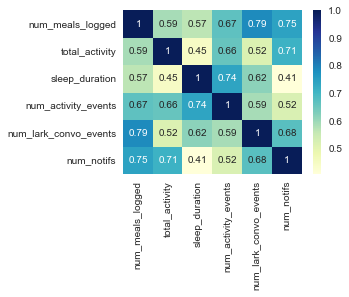

In [50]:
# check correlation excluding num_events because it's a sum of some other columns.
spearman_cormatrix = act_agg[['num_meals_logged','total_activity','sleep_duration','num_activity_events','num_lark_convo_events','num_notifs']].corr(method='spearman') 
plt.figure(figsize=(4, 3))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")
# All of the correlations are positive. 
# Seems like the more notification received, the more likely users would log activity, meals and have lark conversation.
# Seems like the more activity events, the more sleep logged.
# With limited knowledge on column definitions, I would not make any more conclusions here. 

In [53]:
# I thought about merging two dataset together but there are very few users in common between tables, therefore no benifit to merge them.
# act_agg = act_agg.reset_index()
# mission_complete_agg = mission_complete.groupby('user_id').agg({'idusermission':['count']}).reset_index()
# mission_act = pd.merge(act_agg, mission_complete_agg, how = 'inner', left_on = 'user_id',right_on = 'user_id')
# mission_act.shape

In [58]:
# split date column
activity[['dt_ymd','dt_hms']] = activity.dt.str.split(" ",expand=True)
activity[['dt_year','dt_month','dt_day']] = activity.dt_ymd.str.split("-",expand=True).astype(str).astype(int)

In [59]:
''' By observing whenever num_events != 0, one or more following columns are not 0.
So I take num_events != 0 as the user used the app in any kind on that day'''
activity_e = activity[activity['num_events']!=0]
activity_e.user_id = activity_e.user_id.astype(str)

C:\Users\zhang\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [61]:
# get day 1 , 2 , 3... by users to evaluate user interactions.
activity_e["day_number"] = activity_e.groupby("user_id")["dt_day"].rank(method='dense', ascending=True)
activity_e.head()

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,idaggregate_info,user_id,dt,num_events,num_lark_convo_events,num_meals_logged,num_breakfasts,num_lunches,num_dinners,num_snacks,...,sleep_duration,num_activity_events,num_weights,num_notifs,dt_ymd,dt_hms,dt_year,dt_month,dt_day,day_number
27,27,0,2018-08-28 00:00:00,58,15,3,1,1,1,0,...,24300,42,0,9,2018-08-28,00:00:00,2018,8,28,1.0
28,28,0,2018-08-29 00:00:00,36,5,4,1,1,1,1,...,23438,30,0,9,2018-08-29,00:00:00,2018,8,29,2.0
50,50,1,2018-08-22 00:00:00,24,12,3,1,1,0,1,...,0,9,1,7,2018-08-22,00:00:00,2018,8,22,1.0
51,51,1,2018-08-23 00:00:00,12,6,4,1,1,1,1,...,0,4,1,11,2018-08-23,00:00:00,2018,8,23,2.0
52,52,1,2018-08-24 00:00:00,14,5,3,1,1,0,1,...,0,9,0,4,2018-08-24,00:00:00,2018,8,24,3.0


In [63]:
''' evaluate interactions by 'num_events' because it's the sum of some other columns. whenever it's not zero, 
there must be some other columns that are not 0, to simplify the problem, I decided to go by this 'broad' column  '''
event_aggregate = activity_e.groupby('day_number').agg({'num_events':['median','count']})
event_aggregate.head(10)
# Users generally had more interactions on their day 1 than any other days 

num_events      
               median count
day_number                 
1.0              38.0    34
2.0              24.0    32
3.0              20.0    30
4.0              24.0    27
5.0              22.0    25
6.0              17.5    22
7.0              17.0    19
8.0              23.0    16
9.0              20.5    12
10.0             26.0    10

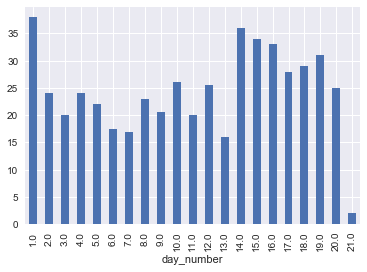

In [92]:
# same findings in plot 
# I would focus on the first 10 days because later days don't have enoug population size therefore they don't have universality 
activity_e.groupby('day_number')['num_events'].median().plot(kind='bar')